### importing libraries<a href="#importing-libraries" class="anchor-link">¶</a>

In \[ \]:

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns

    #Preprocessing
    from sklearn.impute import SimpleImputer
    from sklearn.preprocessing import LabelEncoder, OneHotEncoder
    from sklearn.model_selection import train_test_split
    from scipy.stats import boxcox

    #ml model
    import statsmodels.api as sm
    from sklearn.linear_model import LinearRegression, Lasso,Ridge
    #DecisionTreeRegressor model
    from sklearn.tree import DecisionTreeRegressor
    #RandomForestRegressor
    from sklearn.ensemble import RandomForestRegressor


    #cross-validation
    from sklearn.model_selection import cross_val_score


    from sklearn.metrics import mean_squared_error, root_mean_squared_error

    import warnings
    warnings.filterwarnings("ignore")

### importing data<a href="#importing-data" class="anchor-link">¶</a>

In \[ \]:

    train = pd.read_csv("Train.csv")
    test = pd.read_csv("Test.csv")

    # check the shape of the data
    print(f"shape of Train set: {train.shape}")
    print(f"shape of Test set: {test.shape}")

### Exploratory Data Analaysis<a href="#Exploratory-Data-Analaysis" class="anchor-link">¶</a>

In \[ \]:

    train.head()

In \[10\]:

    #check data of the train 
    train.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 8523 entries, 0 to 8522
    Data columns (total 12 columns):
     #   Column                     Non-Null Count  Dtype  
    ---  ------                     --------------  -----  
     0   Item_Identifier            8523 non-null   object 
     1   Item_Weight                7060 non-null   float64
     2   Item_Fat_Content           8523 non-null   object 
     3   Item_Visibility            8523 non-null   float64
     4   Item_Type                  8523 non-null   object 
     5   Item_MRP                   8523 non-null   float64
     6   Outlet_Identifier          8523 non-null   object 
     7   Outlet_Establishment_Year  8523 non-null   int64  
     8   Outlet_Size                6113 non-null   object 
     9   Outlet_Location_Type       8523 non-null   object 
     10  Outlet_Type                8523 non-null   object 
     11  Item_Outlet_Sales          8523 non-null   float64
    dtypes: float64(4), int64(1), object(7)
    memory usage: 799.2+ KB

In \[11\]:

    #check data of the train 
    test.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 5681 entries, 0 to 5680
    Data columns (total 11 columns):
     #   Column                     Non-Null Count  Dtype  
    ---  ------                     --------------  -----  
     0   Item_Identifier            5681 non-null   object 
     1   Item_Weight                4705 non-null   float64
     2   Item_Fat_Content           5681 non-null   object 
     3   Item_Visibility            5681 non-null   float64
     4   Item_Type                  5681 non-null   object 
     5   Item_MRP                   5681 non-null   float64
     6   Outlet_Identifier          5681 non-null   object 
     7   Outlet_Establishment_Year  5681 non-null   int64  
     8   Outlet_Size                4075 non-null   object 
     9   Outlet_Location_Type       5681 non-null   object 
     10  Outlet_Type                5681 non-null   object 
    dtypes: float64(3), int64(1), object(7)
    memory usage: 488.3+ KB

In \[12\]:

    # summary statistics of numerical variables
    train.describe()

Out\[12\]:

|       | Item_Weight | Item_Visibility | Item_MRP    | Outlet_Establishment_Year | Item_Outlet_Sales |
|-------|-------------|-----------------|-------------|---------------------------|-------------------|
| count | 7060.000000 | 8523.000000     | 8523.000000 | 8523.000000               | 8523.000000       |
| mean  | 12.857645   | 0.066132        | 140.992782  | 1997.831867               | 2181.288914       |
| std   | 4.643456    | 0.051598        | 62.275067   | 8.371760                  | 1706.499616       |
| min   | 4.555000    | 0.000000        | 31.290000   | 1985.000000               | 33.290000         |
| 25%   | 8.773750    | 0.026989        | 93.826500   | 1987.000000               | 834.247400        |
| 50%   | 12.600000   | 0.053931        | 143.012800  | 1999.000000               | 1794.331000       |
| 75%   | 16.850000   | 0.094585        | 185.643700  | 2004.000000               | 3101.296400       |
| max   | 21.350000   | 0.328391        | 266.888400  | 2009.000000               | 13086.964800      |

In \[13\]:

    # summary of categorical variables
    train.describe(include=['object'])

Out\[13\]:

|        | Item_Identifier | Item_Fat_Content | Item_Type             | Outlet_Identifier | Outlet_Size | Outlet_Location_Type | Outlet_Type       |
|--------|-----------------|------------------|-----------------------|-------------------|-------------|----------------------|-------------------|
| count  | 8523            | 8523             | 8523                  | 8523              | 6113        | 8523                 | 8523              |
| unique | 1559            | 5                | 16                    | 10                | 3           | 3                    | 4                 |
| top    | FDW13           | Low Fat          | Fruits and Vegetables | OUT027            | Medium      | Tier 3               | Supermarket Type1 |
| freq   | 10              | 5089             | 1232                  | 935               | 2793        | 3350                 | 5577              |

In \[ \]:

     

In \[14\]:

    # Distribution of target variable
    plt.figure(figsize=(10,6))
    sns.histplot(train['Item_Outlet_Sales'], bins=30, kde=True)
    plt.title('Distribution of Item Outlet Sales')
    plt.xlabel('Item Outlet Sales')
    plt.ylabel('Frequency')
    plt.show()

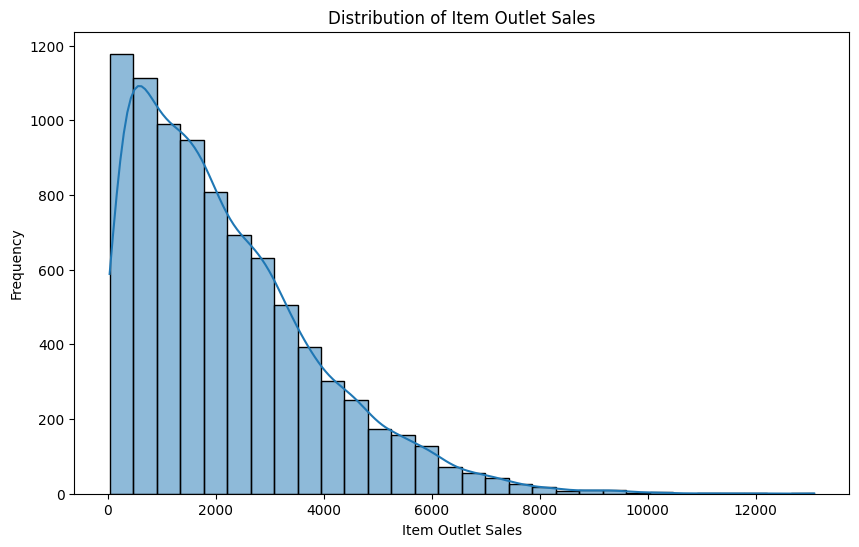

In \[15\]:

    # Correlation matrix
    plt.figure(figsize=(10, 6))
    sns.heatmap(train.select_dtypes(exclude='object').corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()

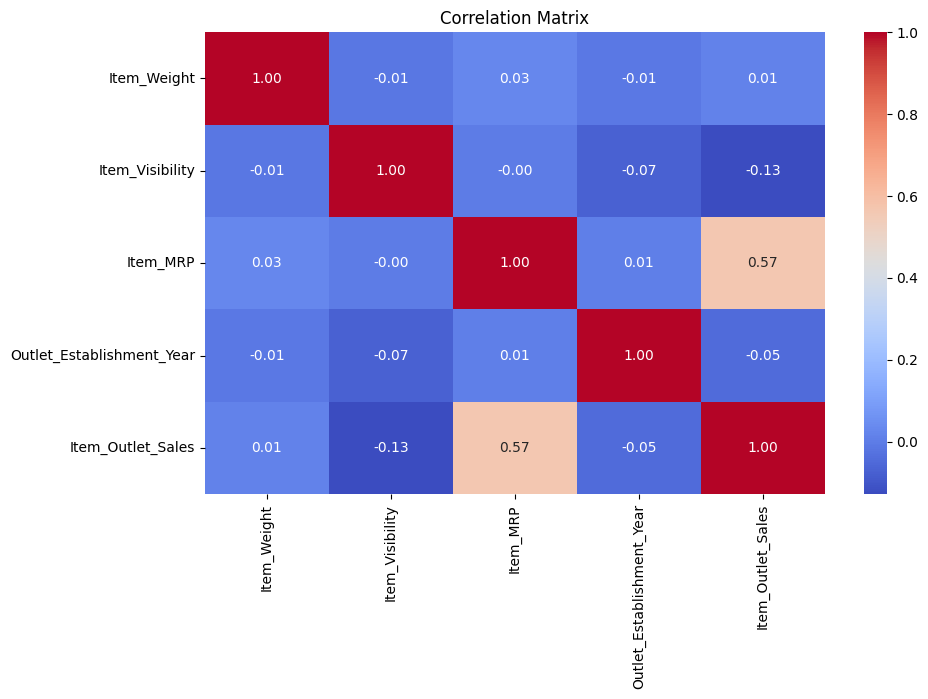

In \[16\]:

    #check the box plot for each numerical column
    for i in train.select_dtypes(exclude='object'):
        sns.boxplot(y=train[i])
        plt.show()

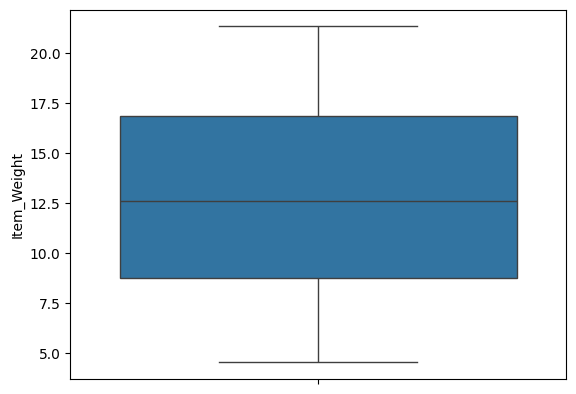

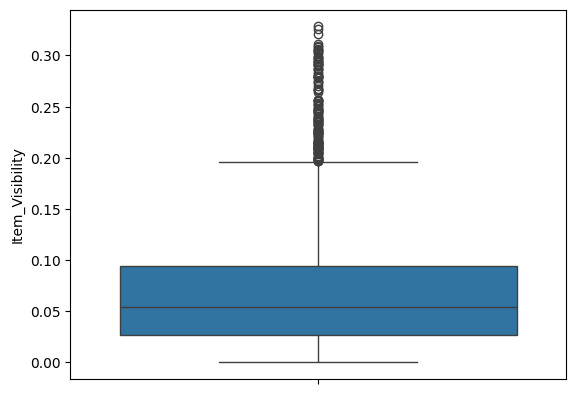

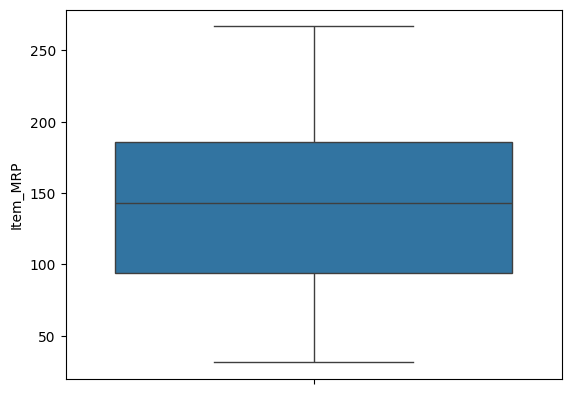

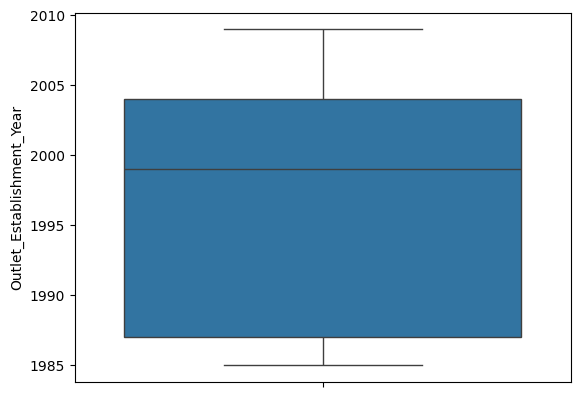

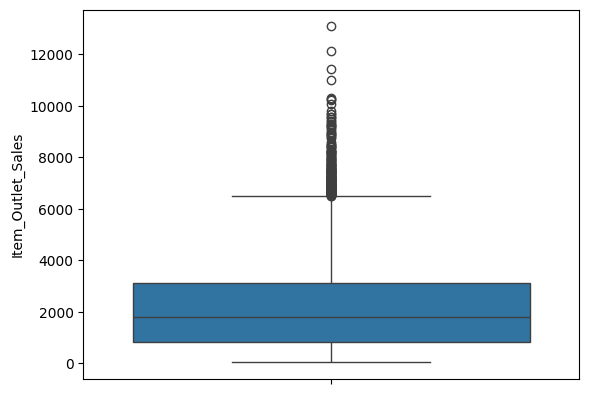

In \[17\]:

    # Countplot of categorical variables
    categorical_vars = train.select_dtypes(include=['object']).columns.tolist()
    for var in categorical_vars:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=var, data=train)
        plt.title(f'Count of {var}')
        plt.xlabel(var)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

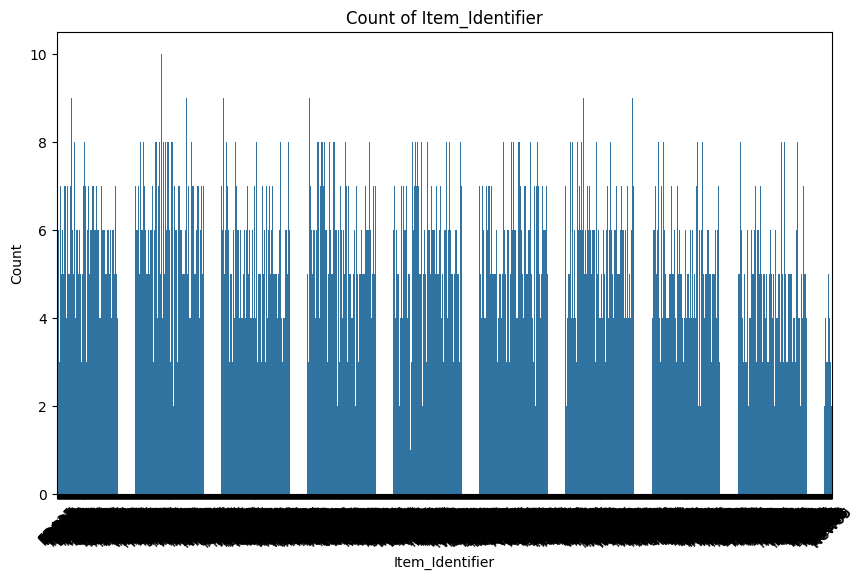

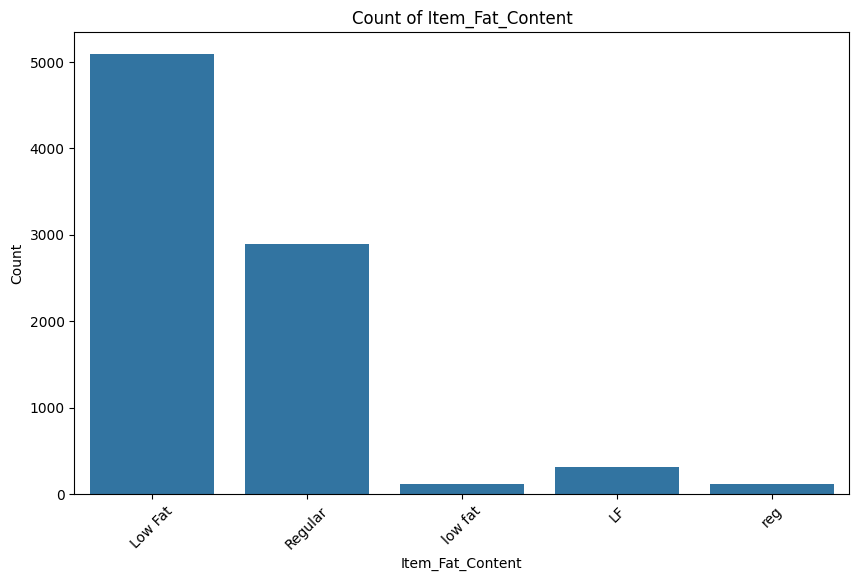

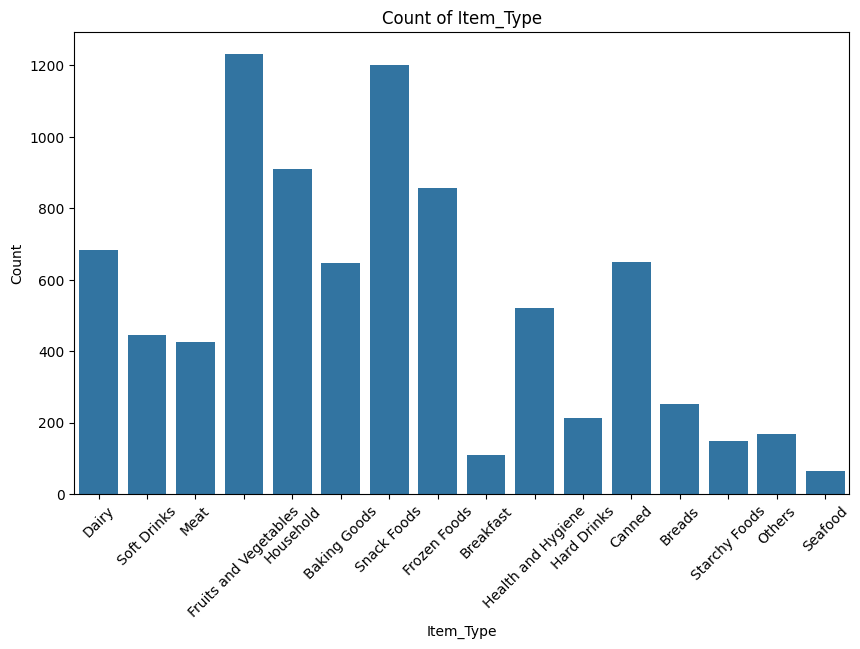

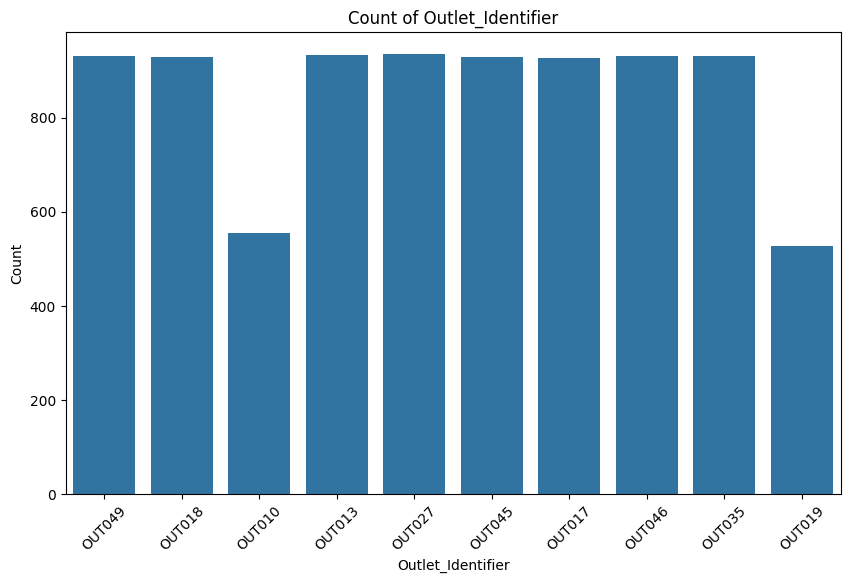

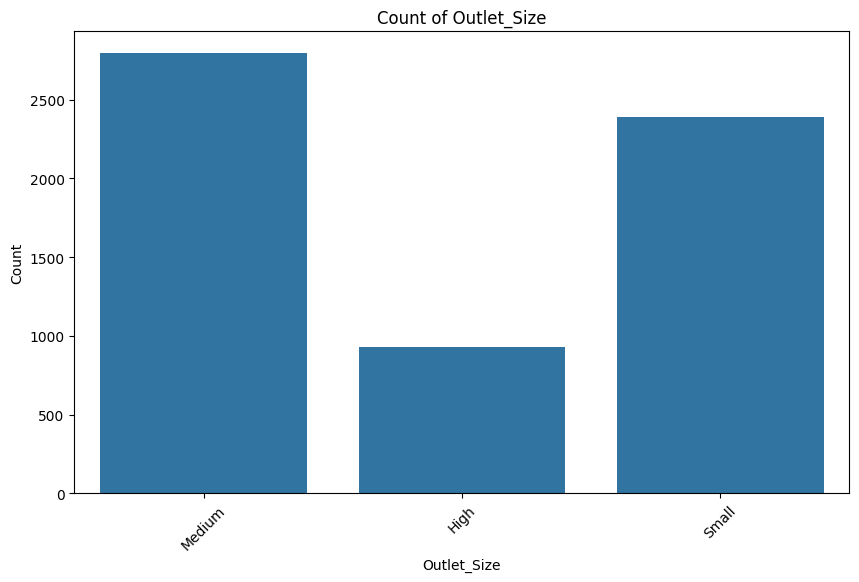

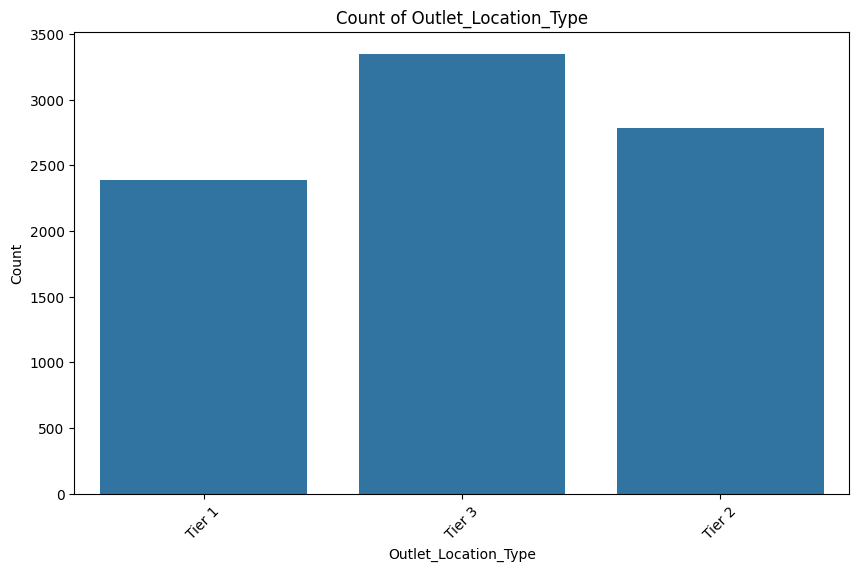

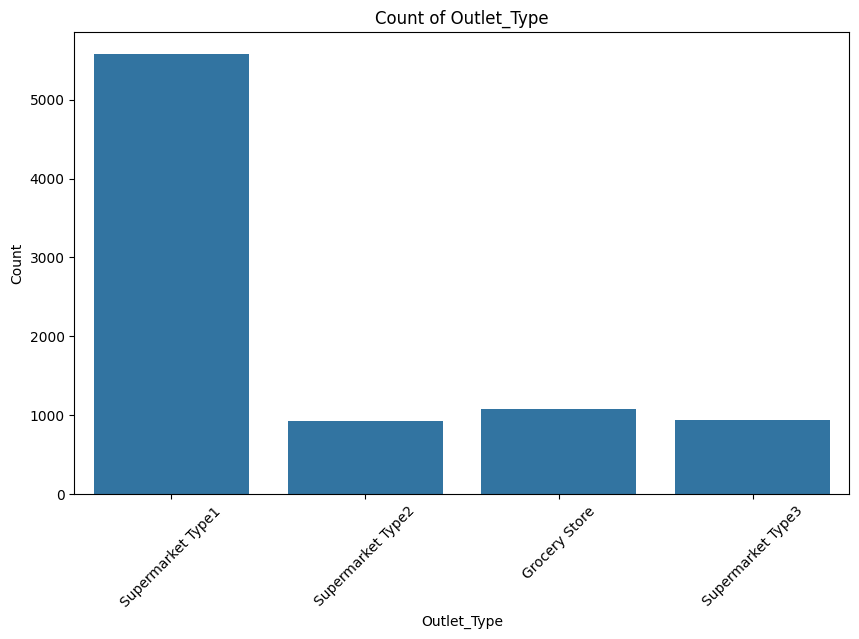

### Data Cleaning<a href="#Data-Cleaning" class="anchor-link">¶</a>

In \[18\]:

    #chcking duplicates
    print(train.duplicated().value_counts())
    print(test.duplicated().value_counts())

    False    8523
    Name: count, dtype: int64
    False    5681
    Name: count, dtype: int64

-   no duplicates

In \[19\]:

    #check the null values in "outlet_size"
    train[train["Outlet_Size"].isnull() ==True]

Out\[19\]:

|      | Item_Identifier | Item_Weight | Item_Fat_Content | Item_Visibility | Item_Type             | Item_MRP | Outlet_Identifier | Outlet_Establishment_Year | Outlet_Size | Outlet_Location_Type | Outlet_Type       | Item_Outlet_Sales |
|------|-----------------|-------------|------------------|-----------------|-----------------------|----------|-------------------|---------------------------|-------------|----------------------|-------------------|-------------------|
| 3    | FDX07           | 19.200      | Regular          | 0.000000        | Fruits and Vegetables | 182.0950 | OUT010            | 1998                      | NaN         | Tier 3               | Grocery Store     | 732.3800          |
| 8    | FDH17           | 16.200      | Regular          | 0.016687        | Frozen Foods          | 96.9726  | OUT045            | 2002                      | NaN         | Tier 2               | Supermarket Type1 | 1076.5986         |
| 9    | FDU28           | 19.200      | Regular          | 0.094450        | Frozen Foods          | 187.8214 | OUT017            | 2007                      | NaN         | Tier 2               | Supermarket Type1 | 4710.5350         |
| 25   | NCD06           | 13.000      | Low Fat          | 0.099887        | Household             | 45.9060  | OUT017            | 2007                      | NaN         | Tier 2               | Supermarket Type1 | 838.9080          |
| 28   | FDE51           | 5.925       | Regular          | 0.161467        | Dairy                 | 45.5086  | OUT010            | 1998                      | NaN         | Tier 3               | Grocery Store     | 178.4344          |
| ...  | ...             | ...         | ...              | ...             | ...                   | ...      | ...               | ...                       | ...         | ...                  | ...               | ...               |
| 8502 | NCH43           | 8.420       | Low Fat          | 0.070712        | Household             | 216.4192 | OUT045            | 2002                      | NaN         | Tier 2               | Supermarket Type1 | 3020.0688         |
| 8508 | FDW31           | 11.350      | Regular          | 0.043246        | Fruits and Vegetables | 199.4742 | OUT045            | 2002                      | NaN         | Tier 2               | Supermarket Type1 | 2587.9646         |
| 8509 | FDG45           | 8.100       | Low Fat          | 0.214306        | Fruits and Vegetables | 213.9902 | OUT010            | 1998                      | NaN         | Tier 3               | Grocery Store     | 424.7804          |
| 8514 | FDA01           | 15.000      | Regular          | 0.054489        | Canned                | 57.5904  | OUT045            | 2002                      | NaN         | Tier 2               | Supermarket Type1 | 468.7232          |
| 8519 | FDS36           | 8.380       | Regular          | 0.046982        | Baking Goods          | 108.1570 | OUT045            | 2002                      | NaN         | Tier 2               | Supermarket Type1 | 549.2850          |

2410 rows × 12 columns

-   in order to fill the nan values in outlet size column, we need to
    explore it and check the outlet in order to extract the missing
    values

In \[20\]:

    #check the values in columns related to "outlet size" where the "outlet size" is null
    print(train[train["Outlet_Size"].isnull() ==True]['Outlet_Location_Type'].value_counts())
    print(train[train["Outlet_Size"].isnull() ==True]['Outlet_Identifier'].value_counts())
    print(train[train["Outlet_Size"].isnull() ==True]['Outlet_Type'].value_counts())

    Outlet_Location_Type
    Tier 2    1855
    Tier 3     555
    Name: count, dtype: int64
    Outlet_Identifier
    OUT045    929
    OUT017    926
    OUT010    555
    Name: count, dtype: int64
    Outlet_Type
    Supermarket Type1    1855
    Grocery Store         555
    Name: count, dtype: int64

#### insights:<a href="#insights:" class="anchor-link">¶</a>

-   it's clearly that \['OUT045', 'OUT017'\] are both \>\> Tier 2 and
    Supermarket type 1
-   \['OUT010'\] is \>\> Tier3 and Grocery Store

#### Decision:<a href="#Decision:" class="anchor-link">¶</a>

-   so we are going to search about the value of "Outlet_Size" that
    oftten shown with these 2 values in both of the listed above cases

In \[21\]:

    ## for both ['OUT045', 'OUT017']
    train[(train["Outlet_Location_Type"] =="Tier 2" ) & (train["Outlet_Type"] =="Supermarket Type1")]['Outlet_Size'].value_counts()

Out\[21\]:

    Outlet_Size
    Small    930
    Name: count, dtype: int64

In \[22\]:

    train[(train['Outlet_Size'].isnull() ==True)]

Out\[22\]:

|      | Item_Identifier | Item_Weight | Item_Fat_Content | Item_Visibility | Item_Type             | Item_MRP | Outlet_Identifier | Outlet_Establishment_Year | Outlet_Size | Outlet_Location_Type | Outlet_Type       | Item_Outlet_Sales |
|------|-----------------|-------------|------------------|-----------------|-----------------------|----------|-------------------|---------------------------|-------------|----------------------|-------------------|-------------------|
| 3    | FDX07           | 19.200      | Regular          | 0.000000        | Fruits and Vegetables | 182.0950 | OUT010            | 1998                      | NaN         | Tier 3               | Grocery Store     | 732.3800          |
| 8    | FDH17           | 16.200      | Regular          | 0.016687        | Frozen Foods          | 96.9726  | OUT045            | 2002                      | NaN         | Tier 2               | Supermarket Type1 | 1076.5986         |
| 9    | FDU28           | 19.200      | Regular          | 0.094450        | Frozen Foods          | 187.8214 | OUT017            | 2007                      | NaN         | Tier 2               | Supermarket Type1 | 4710.5350         |
| 25   | NCD06           | 13.000      | Low Fat          | 0.099887        | Household             | 45.9060  | OUT017            | 2007                      | NaN         | Tier 2               | Supermarket Type1 | 838.9080          |
| 28   | FDE51           | 5.925       | Regular          | 0.161467        | Dairy                 | 45.5086  | OUT010            | 1998                      | NaN         | Tier 3               | Grocery Store     | 178.4344          |
| ...  | ...             | ...         | ...              | ...             | ...                   | ...      | ...               | ...                       | ...         | ...                  | ...               | ...               |
| 8502 | NCH43           | 8.420       | Low Fat          | 0.070712        | Household             | 216.4192 | OUT045            | 2002                      | NaN         | Tier 2               | Supermarket Type1 | 3020.0688         |
| 8508 | FDW31           | 11.350      | Regular          | 0.043246        | Fruits and Vegetables | 199.4742 | OUT045            | 2002                      | NaN         | Tier 2               | Supermarket Type1 | 2587.9646         |
| 8509 | FDG45           | 8.100       | Low Fat          | 0.214306        | Fruits and Vegetables | 213.9902 | OUT010            | 1998                      | NaN         | Tier 3               | Grocery Store     | 424.7804          |
| 8514 | FDA01           | 15.000      | Regular          | 0.054489        | Canned                | 57.5904  | OUT045            | 2002                      | NaN         | Tier 2               | Supermarket Type1 | 468.7232          |
| 8519 | FDS36           | 8.380       | Regular          | 0.046982        | Baking Goods          | 108.1570 | OUT045            | 2002                      | NaN         | Tier 2               | Supermarket Type1 | 549.2850          |

2410 rows × 12 columns

In \[23\]:

    ## so for ['OUT010']
    train[(train["Outlet_Location_Type"] =="Tier 3" ) & (train["Outlet_Type"] =="Grocery Store")]['Outlet_Size'].value_counts()

Out\[23\]:

    Series([], Name: count, dtype: int64)

-   there are no values have the both loctaion_type and type of the
    outlet so we should find any other column refer to it

In \[24\]:

    print(train[train["Outlet_Type"] == "Grocery Store"]['Outlet_Size'].value_counts())
    print(train[(train['Outlet_Location_Type'] == "Tier 3") ]['Outlet_Size'].value_counts())

    Outlet_Size
    Small    528
    Name: count, dtype: int64
    Outlet_Size
    Medium    1863
    High       932
    Name: count, dtype: int64

#### insights:<a href="#insights:" class="anchor-link">¶</a>

-   we found that, "Grocery store" appears in every time that we see
    "Small" size
-   however that, the size of "Tier 3" always medium or high

#### Decision:<a href="#Decision:" class="anchor-link">¶</a>

-   i will assume that it's medium since it's the mode value before the
    last editing that we made on the previous nulls

In \[25\]:

    #so "Outlet_Size" of ['OUT045', 'OUT017'] will be >> "Small"
    train.loc[(train['Outlet_Size'].isnull() ==True) &(train['Outlet_Identifier'] != 'OUT010'),"Outlet_Size"] = "Small"


    ## for other outlets identifier they will be "Medium"
    train.loc[(train['Outlet_Size'].isnull() ==True) &(train['Outlet_Identifier'] == 'OUT010'),"Outlet_Size"] = "Medium"

In \[26\]:

    #check the columns that still have nulls:
    train.isnull().sum()

Out\[26\]:

    Item_Identifier                 0
    Item_Weight                  1463
    Item_Fat_Content                0
    Item_Visibility                 0
    Item_Type                       0
    Item_MRP                        0
    Outlet_Identifier               0
    Outlet_Establishment_Year       0
    Outlet_Size                     0
    Outlet_Location_Type            0
    Outlet_Type                     0
    Item_Outlet_Sales               0
    dtype: int64

-   Handeling the Nulls in Item_Weight

In \[27\]:

    ### using sklearn preprocessing to impute null values with mean
    imputer = SimpleImputer()
    Item_Weight = imputer.fit_transform(train['Item_Weight'].values.reshape(-1,1))

    #check the distribution 
    sns.histplot(Item_Weight,kde=True)


    # assign the item weight in the data
    train['Item_Weight'] = Item_Weight

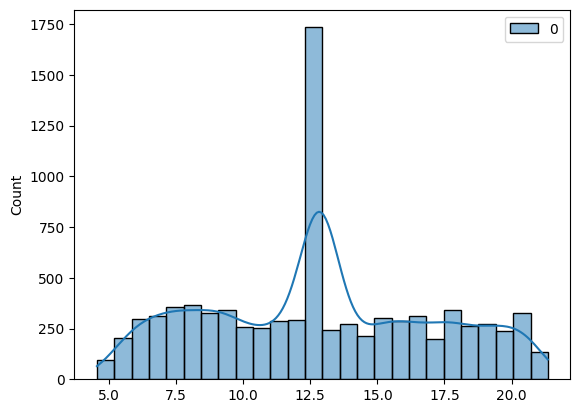

In \[28\]:

    ## change the minimum values of "Item_Visibility" by giving them mean value , since 0 visibility is not realistic
    train.loc[train['Item_Visibility']==0, 'Item_Visibility'] = train['Item_Visibility'].mean()

### Feature Engineering<a href="#Feature-Engineering" class="anchor-link">¶</a>

In \[29\]:

    #extract number of years for each outlet 
    train['Outlet_Age'] = 2019 - train['Outlet_Establishment_Year']
    train['Outlet_Age']

Out\[29\]:

    0       20
    1       10
    2       20
    3       21
    4       32
            ..
    8518    32
    8519    17
    8520    15
    8521    10
    8522    22
    Name: Outlet_Age, Length: 8523, dtype: int64

In \[30\]:

    # Check the age of every branch and its sales
    aged_outlets = train.groupby(['Outlet_Identifier','Outlet_Age'],as_index=False)['Item_Outlet_Sales'].mean().sort_values(by='Item_Outlet_Sales')
    aged_outlets.set_index('Outlet_Identifier',inplace=True)
    # #scaling mean sales by dividing on 100
    # aged_outlets['Item_Outlet_Sales'] = aged_outlets['Item_Outlet_Sales']

    aged_outlets

Out\[30\]:

|                   | Outlet_Age | Item_Outlet_Sales |
|-------------------|------------|-------------------|
| Outlet_Identifier |            |                   |
| OUT010            | 21         | 339.351662        |
| OUT019            | 34         | 340.329723        |
| OUT018            | 10         | 1995.498739       |
| OUT045            | 17         | 2192.384798       |
| OUT046            | 22         | 2277.844267       |
| OUT013            | 32         | 2298.995256       |
| OUT017            | 12         | 2340.675263       |
| OUT049            | 20         | 2348.354635       |
| OUT035            | 15         | 2438.841866       |
| OUT027            | 34         | 3694.038558       |

In \[31\]:

    ## exctracting items_type_classification column from Item_identitfier
    train['Item_ID_Type']=train['Item_Identifier'].apply(lambda x: "Food" if x[:2] =='FD' 
                                                   else( "Drink" if x[:2]=='DR' else "Non-Consumable") )
    train['Item_ID_Type'].value_counts()

Out\[31\]:

    Item_ID_Type
    Food              6125
    Non-Consumable    1599
    Drink              799
    Name: count, dtype: int64

### Preprocessing<a href="#Preprocessing" class="anchor-link">¶</a>

-   "Item_Fat_Content" \>\> has same values with different labels need
    to be adjusted
-   "Item_Identifier" of each item start with \['fd' or 'dr' or 'nc'\]
    \>\> can be used as item type identifier for FOOD , Drink,
    Non-Consumable

In \[32\]:

    ## adjusting values of fat_content
    train['Item_Fat_Content']= train['Item_Fat_Content'].apply(lambda x: "Regular" if x=='reg' or x == 'Regular' else 'Low Fat')

In \[33\]:

    ### using labelEncoder for ['Item_Identifier','Outlet_Identifier']
    lencod = LabelEncoder()
    ids = ['Item_Identifier','Outlet_Identifier','Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_ID_Type']
    for i in ids:
        train[i]=lencod.fit_transform(train[i])
    train

Out\[33\]:

|      | Item_Identifier | Item_Weight | Item_Fat_Content | Item_Visibility | Item_Type             | Item_MRP | Outlet_Identifier | Outlet_Establishment_Year | Outlet_Size | Outlet_Location_Type | Outlet_Type | Item_Outlet_Sales | Outlet_Age | Item_ID_Type |
|------|-----------------|-------------|------------------|-----------------|-----------------------|----------|-------------------|---------------------------|-------------|----------------------|-------------|-------------------|------------|--------------|
| 0    | 156             | 9.300       | 0                | 0.016047        | Dairy                 | 249.8092 | 9                 | 1999                      | 1           | 0                    | 1           | 3735.1380         | 20         | 1            |
| 1    | 8               | 5.920       | 1                | 0.019278        | Soft Drinks           | 48.2692  | 3                 | 2009                      | 1           | 2                    | 2           | 443.4228          | 10         | 0            |
| 2    | 662             | 17.500      | 0                | 0.016760        | Meat                  | 141.6180 | 9                 | 1999                      | 1           | 0                    | 1           | 2097.2700         | 20         | 1            |
| 3    | 1121            | 19.200      | 1                | 0.066132        | Fruits and Vegetables | 182.0950 | 0                 | 1998                      | 1           | 2                    | 0           | 732.3800          | 21         | 1            |
| 4    | 1297            | 8.930       | 0                | 0.066132        | Household             | 53.8614  | 1                 | 1987                      | 0           | 2                    | 1           | 994.7052          | 32         | 2            |
| ...  | ...             | ...         | ...              | ...             | ...                   | ...      | ...               | ...                       | ...         | ...                  | ...         | ...               | ...        | ...          |
| 8518 | 370             | 6.865       | 0                | 0.056783        | Snack Foods           | 214.5218 | 1                 | 1987                      | 0           | 2                    | 1           | 2778.3834         | 32         | 1            |
| 8519 | 897             | 8.380       | 1                | 0.046982        | Baking Goods          | 108.1570 | 7                 | 2002                      | 2           | 1                    | 1           | 549.2850          | 17         | 1            |
| 8520 | 1357            | 10.600      | 0                | 0.035186        | Health and Hygiene    | 85.1224  | 6                 | 2004                      | 2           | 1                    | 1           | 1193.1136         | 15         | 2            |
| 8521 | 681             | 7.210       | 1                | 0.145221        | Snack Foods           | 103.1332 | 3                 | 2009                      | 1           | 2                    | 2           | 1845.5976         | 10         | 1            |
| 8522 | 50              | 14.800      | 0                | 0.044878        | Soft Drinks           | 75.4670  | 8                 | 1997                      | 2           | 0                    | 1           | 765.6700          | 22         | 0            |

8523 rows × 14 columns

In \[34\]:

    ### using get_dummies to make one hot encoding for ther other categorical columns
    lb = OneHotEncoder()
    cat_cols = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_ID_Type']

    train = pd.get_dummies(train,columns=cat_cols, dtype=int)
        
    train.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 8523 entries, 0 to 8522
    Data columns (total 24 columns):
     #   Column                     Non-Null Count  Dtype  
    ---  ------                     --------------  -----  
     0   Item_Identifier            8523 non-null   int32  
     1   Item_Weight                8523 non-null   float64
     2   Item_Visibility            8523 non-null   float64
     3   Item_Type                  8523 non-null   object 
     4   Item_MRP                   8523 non-null   float64
     5   Outlet_Identifier          8523 non-null   int32  
     6   Outlet_Establishment_Year  8523 non-null   int64  
     7   Item_Outlet_Sales          8523 non-null   float64
     8   Outlet_Age                 8523 non-null   int64  
     9   Item_Fat_Content_0         8523 non-null   int32  
     10  Item_Fat_Content_1         8523 non-null   int32  
     11  Outlet_Size_0              8523 non-null   int32  
     12  Outlet_Size_1              8523 non-null   int32  
     13  Outlet_Size_2              8523 non-null   int32  
     14  Outlet_Location_Type_0     8523 non-null   int32  
     15  Outlet_Location_Type_1     8523 non-null   int32  
     16  Outlet_Location_Type_2     8523 non-null   int32  
     17  Outlet_Type_0              8523 non-null   int32  
     18  Outlet_Type_1              8523 non-null   int32  
     19  Outlet_Type_2              8523 non-null   int32  
     20  Outlet_Type_3              8523 non-null   int32  
     21  Item_ID_Type_0             8523 non-null   int32  
     22  Item_ID_Type_1             8523 non-null   int32  
     23  Item_ID_Type_2             8523 non-null   int32  
    dtypes: float64(4), int32(17), int64(2), object(1)
    memory usage: 1.0+ MB

In \[35\]:

    ## delete "Outlet_Establishment_Year" and 'Item_Type' columns 
    train.drop(columns=['Outlet_Establishment_Year','Item_Type'], inplace=True)

### ETL (Extract, Transform, Laod) function for the test data to transform it<a
href="#ETL-(Extract,-Transform,-Laod)-function-for-the-test-data-to-transform-it"
class="anchor-link">¶</a>

In \[36\]:

    def etl(in_df):
        #so "Outlet_Size" of ['OUT045', 'OUT017'] will be >> "Small" and last one will be  'Medium'
        in_df.loc[(in_df['Outlet_Size'].isnull() ==True) &(in_df['Outlet_Identifier'] != 'OUT010'),"Outlet_Size"] = "Small"
        in_df.loc[(in_df['Outlet_Size'].isnull() ==True) &(in_df['Outlet_Identifier'] == 'OUT010'),"Outlet_Size"] = "Medium"
        
        # using sklearn preprocessing to impute null values with mean
        imputer = SimpleImputer()
        Item_Weight = imputer.fit_transform(in_df['Item_Weight'].values.reshape(-1,1))
        in_df['Item_Weight'] = Item_Weight
        
        ## change the minimum values of "Item_Visibility" by giving them mean value
        in_df.loc[in_df['Item_Visibility']==0, 'Item_Visibility'] = in_df['Item_Visibility'].mean()

        #extract number of years for each outlet 
        in_df['Outlet_Age'] = 2019 - in_df['Outlet_Establishment_Year']
        

        ## adjusting values of fat_content
        in_df['Item_Fat_Content']= in_df['Item_Fat_Content'].apply(lambda x: "Regular" if x=='reg' or x == 'Regular' else 'Low Fat')
        
        ## exctracting items_type_classification column from Item_identitfier
        in_df['Item_ID_Type']=in_df['Item_Identifier'].apply(lambda x: "Food" if x[:2] =='FD' 
                                                   else( "Drink" if x[:2]=='DR' else "Non-Consumable") )
        
        ## delete "Outlet_Establishment_Year" and 'Item_Type' columns
        in_df.drop(columns=['Outlet_Establishment_Year','Item_Type'], inplace=True)
        
        #start encoding columns
        ##start with labelencoding
        ids = ['Item_Identifier','Outlet_Identifier','Item_Fat_Content','Outlet_Size'
               ,'Outlet_Location_Type','Outlet_Type','Item_ID_Type']
        for i in ids:
            in_df[i]=lencod.fit_transform(in_df[i])
            
        
        ### using get_dummies to make one hot encoding for ther other categorical columns
        cat_cols = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_ID_Type']
        in_df = pd.get_dummies(in_df,columns=cat_cols, dtype=int)
        
        out_df = in_df.copy()
        return out_df

In \[37\]:

    # transform the test data
    test_updated = etl(test)
    test_updated.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 5681 entries, 0 to 5680
    Data columns (total 21 columns):
     #   Column                  Non-Null Count  Dtype  
    ---  ------                  --------------  -----  
     0   Item_Identifier         5681 non-null   int32  
     1   Item_Weight             5681 non-null   float64
     2   Item_Visibility         5681 non-null   float64
     3   Item_MRP                5681 non-null   float64
     4   Outlet_Identifier       5681 non-null   int32  
     5   Outlet_Age              5681 non-null   int64  
     6   Item_Fat_Content_0      5681 non-null   int32  
     7   Item_Fat_Content_1      5681 non-null   int32  
     8   Outlet_Size_0           5681 non-null   int32  
     9   Outlet_Size_1           5681 non-null   int32  
     10  Outlet_Size_2           5681 non-null   int32  
     11  Outlet_Location_Type_0  5681 non-null   int32  
     12  Outlet_Location_Type_1  5681 non-null   int32  
     13  Outlet_Location_Type_2  5681 non-null   int32  
     14  Outlet_Type_0           5681 non-null   int32  
     15  Outlet_Type_1           5681 non-null   int32  
     16  Outlet_Type_2           5681 non-null   int32  
     17  Outlet_Type_3           5681 non-null   int32  
     18  Item_ID_Type_0          5681 non-null   int32  
     19  Item_ID_Type_1          5681 non-null   int32  
     20  Item_ID_Type_2          5681 non-null   int32  
    dtypes: float64(3), int32(17), int64(1)
    memory usage: 554.9 KB

In \[38\]:

    # split target vector
    y = train['Item_Outlet_Sales'].copy()
    X = train.drop(columns='Item_Outlet_Sales')

    ### first will split train to 4 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=20)

    X_train.shape , y_train.shape

Out\[38\]:

    ((5710, 21), (5710,))

### creating ML model<a href="#creating-ML-model" class="anchor-link">¶</a>

In \[39\]:

    # Add a constant term for the intercept
    X_train_cons = sm.add_constant(X_train)

    # Fit the OLS regression model
    model = sm.OLS(y_train, X_train_cons)
    result = model.fit()

    # Print the summary of the model
    print(result.summary())

                                OLS Regression Results                            
    ==============================================================================
    Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.565
    Model:                            OLS   Adj. R-squared:                  0.564
    Method:                 Least Squares   F-statistic:                     462.8
    Date:                Sat, 23 Mar 2024   Prob (F-statistic):               0.00
    Time:                        06:12:38   Log-Likelihood:                -48231.
    No. Observations:                5710   AIC:                         9.650e+04
    Df Residuals:                    5693   BIC:                         9.661e+04
    Df Model:                          16                                         
    Covariance Type:            nonrobust                                         
    ==========================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
    ------------------------------------------------------------------------------------------
    const                   2032.3903    600.113      3.387      0.001     855.940    3208.841
    Item_Identifier            0.0185      0.054      0.343      0.732      -0.087       0.124
    Item_Weight               -3.2522      3.553     -0.915      0.360     -10.217       3.712
    Item_Visibility          146.2596    325.402      0.449      0.653    -491.653     784.172
    Item_MRP                  15.7356      0.242     65.011      0.000      15.261      16.210
    Outlet_Identifier        158.0309     55.748      2.835      0.005      48.744     267.318
    Outlet_Age              -196.2696     58.745     -3.341      0.001    -311.432     -81.107
    Item_Fat_Content_0       993.3672    300.258      3.308      0.001     404.747    1581.987
    Item_Fat_Content_1      1039.0231    300.852      3.454      0.001     449.238    1628.808
    Outlet_Size_0           3935.0386   1155.268      3.406      0.001    1670.274    6199.804
    Outlet_Size_1          -1165.3419    364.588     -3.196      0.001   -1880.073    -450.611
    Outlet_Size_2           -737.3064    199.188     -3.702      0.000   -1127.791    -346.822
    Outlet_Location_Type_0  1498.8816    417.493      3.590      0.000     680.436    2317.327
    Outlet_Location_Type_1   590.6917    159.823      3.696      0.000     277.378     904.006
    Outlet_Location_Type_2   -57.1830     84.666     -0.675      0.499    -223.160     108.795
    Outlet_Type_0           -275.1344    462.809     -0.594      0.552   -1182.416     632.147
    Outlet_Type_1          -1369.6528    467.042     -2.933      0.003   -2285.232    -454.074
    Outlet_Type_2          -1210.4883    353.936     -3.420      0.001   -1904.338    -516.639
    Outlet_Type_3           4887.6659    953.395      5.127      0.000    3018.649    6756.683
    Item_ID_Type_0           669.8161    206.095      3.250      0.001     265.792    1073.840
    Item_ID_Type_1           695.1445    201.063      3.457      0.001     300.985    1089.304
    Item_ID_Type_2           667.4297    206.187      3.237      0.001     263.224    1071.635
    ==============================================================================
    Omnibus:                      587.591   Durbin-Watson:                   2.003
    Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1266.557
    Skew:                           0.644   Prob(JB):                    9.35e-276
    Kurtosis:                       4.915   Cond. No.                     1.45e+19
    ==============================================================================

    Notes:
    [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
    [2] The smallest eigenvalue is 2.23e-29. This might indicate that there are
    strong multicollinearity problems or that the design matrix is singular.

In \[40\]:

    # Add a constant term for the intercept
    X_test_cons = sm.add_constant(X_test)

    # Make predictions
    predictions_sm = result.predict(X_test_cons)

#### Evaluate the model<a href="#Evaluate-the-model" class="anchor-link">¶</a>

In \[41\]:

    # Compute residuals
    residuals = y_test - predictions_sm

    # Compute Mean Squared Error (MSE)
    mse_sm = mean_squared_error(y_test, predictions_sm)
    print("Mean Squared Error (MSE):", mse_sm)

    # Compute Root Mean Squared Error (RMSE)
    rmse_sm = root_mean_squared_error(y_test, predictions_sm)
    print("Root Mean Squared Error (RMSE):", rmse_sm)

    Mean Squared Error (MSE): 1273302.3225726418
    Root Mean Squared Error (RMSE): 1128.4069844575768

#### check the model after using boxcox to solve the skewwness in the data<a
href="#check-the-model-after-using-boxcox-to-solve-the-skewwness-in-the-data"
class="anchor-link">¶</a>

In \[42\]:

    #correct skewness coefficients using boxcox for positive variables
    # First apply box-cox to positive columns
    X_train_bx = X_train.copy()
    pos_indx = X_train_bx.apply(lambda x: np.all(x>0))

    X_train_bx.loc[:, pos_indx] = X_train_bx.loc[:, pos_indx].apply(lambda x: boxcox(x)[0])

    X_train_bx.head()

Out\[42\]:

|      | Item_Identifier | Item_Weight | Item_Visibility | Item_MRP  | Outlet_Identifier | Outlet_Age | Item_Fat_Content_0 | Item_Fat_Content_1 | Outlet_Size_0 | Outlet_Size_1 | ... | Outlet_Location_Type_0 | Outlet_Location_Type_1 | Outlet_Location_Type_2 | Outlet_Type_0 | Outlet_Type_1 | Outlet_Type_2 | Outlet_Type_3 | Item_ID_Type_0 | Item_ID_Type_1 | Item_ID_Type_2 |
|------|-----------------|-------------|-----------------|-----------|-------------------|------------|--------------------|--------------------|---------------|---------------|-----|------------------------|------------------------|------------------------|---------------|---------------|---------------|---------------|----------------|----------------|----------------|
| 5690 | 224             | 6.115075    | -1.761629       | 59.569127 | 6                 | 3.163309   | 0                  | 1                  | 0             | 0             | ... | 0                      | 1                      | 0                      | 0             | 1             | 0             | 0             | 0              | 1              | 0              |
| 7662 | 559             | 3.452909    | -1.944430       | 68.641727 | 8                 | 3.693191   | 1                  | 0                  | 0             | 0             | ... | 1                      | 0                      | 0                      | 0             | 1             | 0             | 0             | 0              | 1              | 0              |
| 6887 | 836             | 10.384214   | -1.934899       | 51.786413 | 1                 | 4.234045   | 1                  | 0                  | 1             | 0             | ... | 0                      | 0                      | 1                      | 0             | 1             | 0             | 0             | 0              | 1              | 0              |
| 8048 | 42              | 5.330928    | -2.182757       | 16.212054 | 1                 | 4.234045   | 1                  | 0                  | 1             | 0             | ... | 0                      | 0                      | 1                      | 0             | 1             | 0             | 0             | 1              | 0              | 0              |
| 4787 | 985             | 6.941570    | -2.412516       | 49.341135 | 6                 | 3.163309   | 1                  | 0                  | 0             | 0             | ... | 0                      | 1                      | 0                      | 0             | 1             | 0             | 0             | 0              | 1              | 0              |

5 rows × 21 columns

In \[43\]:

    # Add a constant term for the intercept
    X_train_cons_box = sm.add_constant(X_train_bx)

    # Fit the OLS regression model
    model = sm.OLS(y_train, X_train_cons_box)
    result = model.fit()

    # Print the summary of the model
    print(result.summary())

                                OLS Regression Results                            
    ==============================================================================
    Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.564
    Model:                            OLS   Adj. R-squared:                  0.562
    Method:                 Least Squares   F-statistic:                     459.6
    Date:                Sat, 23 Mar 2024   Prob (F-statistic):               0.00
    Time:                        06:12:39   Log-Likelihood:                -48242.
    No. Observations:                5710   AIC:                         9.652e+04
    Df Residuals:                    5693   BIC:                         9.663e+04
    Df Model:                          16                                         
    Covariance Type:            nonrobust                                         
    ==========================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
    ------------------------------------------------------------------------------------------
    const                   3181.1126   1026.402      3.099      0.002    1168.974    5193.251
    Item_Identifier            0.0148      0.054      0.273      0.785      -0.091       0.121
    Item_Weight               -6.4039      7.282     -0.879      0.379     -20.680       7.872
    Item_Visibility           40.6986     44.793      0.909      0.364     -47.113     128.510
    Item_MRP                  67.1791      1.038     64.698      0.000      65.144      69.215
    Outlet_Identifier        197.7275     68.589      2.883      0.004      63.268     332.187
    Outlet_Age             -2514.3941    765.849     -3.283      0.001   -4015.750   -1013.039
    Item_Fat_Content_0      1567.1047    513.267      3.053      0.002     560.906    2573.303
    Item_Fat_Content_1      1614.0079    513.720      3.142      0.002     606.920    2621.096
    Outlet_Size_0           3461.2067   1055.351      3.280      0.001    1392.317    5530.096
    Outlet_Size_1           -349.4894    106.360     -3.286      0.001    -557.995    -140.984
    Outlet_Size_2             69.3953     92.864      0.747      0.455    -112.654     251.444
    Outlet_Location_Type_0  1524.8949    455.149      3.350      0.001     632.630    2417.159
    Outlet_Location_Type_1   733.6622    225.236      3.257      0.001     292.114    1175.210
    Outlet_Location_Type_2   922.5555    366.431      2.518      0.012     204.210    1640.901
    Outlet_Type_0            226.2040    639.965      0.353      0.724   -1028.372    1480.780
    Outlet_Type_1           -250.0569    131.409     -1.903      0.057    -507.670       7.556
    Outlet_Type_2          -1182.2484    336.008     -3.519      0.000   -1840.952    -523.545
    Outlet_Type_3           4387.2140    835.831      5.249      0.000    2748.667    6025.761
    Item_ID_Type_0          1055.5320    345.922      3.051      0.002     377.393    1733.671
    Item_ID_Type_1          1074.1951    342.583      3.136      0.002     402.603    1745.787
    Item_ID_Type_2          1051.3855    345.742      3.041      0.002     373.600    1729.171
    ==============================================================================
    Omnibus:                      641.735   Durbin-Watson:                   2.002
    Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.686
    Skew:                           0.693   Prob(JB):                    7.67e-302
    Kurtosis:                       4.976   Cond. No.                     1.41e+19
    ==============================================================================

    Notes:
    [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
    [2] The smallest eigenvalue is 2.34e-29. This might indicate that there are
    strong multicollinearity problems or that the design matrix is singular.

In \[44\]:

    # Add a constant term for the intercept
    X_test_cons_box = sm.add_constant(X_test)

    # Make predictions
    predictions_box = result.predict(X_test_cons_box)

    residuals = y_test - predictions_box

    # Compute Mean Squared Error (MSE)
    mse_bx = mean_squared_error(y_test, predictions_box)
    print("Mean Squared Error (MSE):", mse_bx)

    # Compute Root Mean Squared Error (RMSE)
    rmse_bx = root_mean_squared_error(y_test, predictions_box)
    print("Root Mean Squared Error (RMSE):", rmse_bx)

    Mean Squared Error (MSE): 1805830021.202969
    Root Mean Squared Error (RMSE): 42495.058785733774

#### insights:<a href="#insights:" class="anchor-link">¶</a>

-   the model accuracy is better without adding the boxcox

#### Trying leinar regression from the sklearn<a href="#Trying-leinar-regression-from-the-sklearn"
class="anchor-link">¶</a>

In \[45\]:

    lg = LinearRegression()

    lg.fit(X_train, y_train)

    #checking the score
    print(f"Linear Regression Score: {lg.score(X_train, y_train)}")

    Linear Regression Score: 0.5653509370352546

In \[46\]:

    y_pred = lg.predict(X_test)

    # checking the mean squared error and root mean squared error
    mse_lg = mean_squared_error(y_test, y_pred)
    rmse_lg = root_mean_squared_error(y_test, y_pred)

    print(f"Mean Squared Error for Regression: {mse_lg}")
    print(f"Root Mean Squared Error: {rmse_lg}")

    Mean Squared Error for Regression: 1273302.322572642
    Root Mean Squared Error: 1128.4069844575768

### Applying PCA<a href="#Applying-PCA" class="anchor-link">¶</a>

In \[47\]:

    from sklearn.decomposition import PCA

    pca = PCA()
    X_pca = pca.fit_transform(X_train)

In \[48\]:

    lg.fit(X_pca, y_train)

    #checking the score
    print(f"Linear Regression Score: {lg.score(X_pca, y_train)}")

    Linear Regression Score: 0.5653509370352545

In \[49\]:

    y_pred_pca = lg.predict(X_test)

    # checking the mean squared error and root mean squared error
    mse_lg_pca = mean_squared_error(y_test, y_pred_pca)
    rmse_lg_pca = root_mean_squared_error(y_test, y_pred_pca)

    print(f"Mean Squared Error for Regression: {mse_lg_pca}")
    print(f"Root Mean Squared Error: {rmse_lg_pca}")

    Mean Squared Error for Regression: 44761778.59002634
    Root Mean Squared Error: 6690.42439535986

In \[50\]:

    # Loop through different numbers of principal components
    rmse_pcr = []

    for i in np.arange(1, 50):
        score = cross_val_score(lg, X_pca[:, :i], y_train, cv=5, scoring='neg_mean_squared_error').mean()
        rmse_pcr.append(np.sqrt(-1*score))


    # Plotting the RMSE values against the number of principal components
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(1, 50), rmse_pcr, marker='o', linestyle='-')
    plt.title('RMSE vs Number of Principal Components')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('RMSE')
    plt.grid(True)
    plt.show()

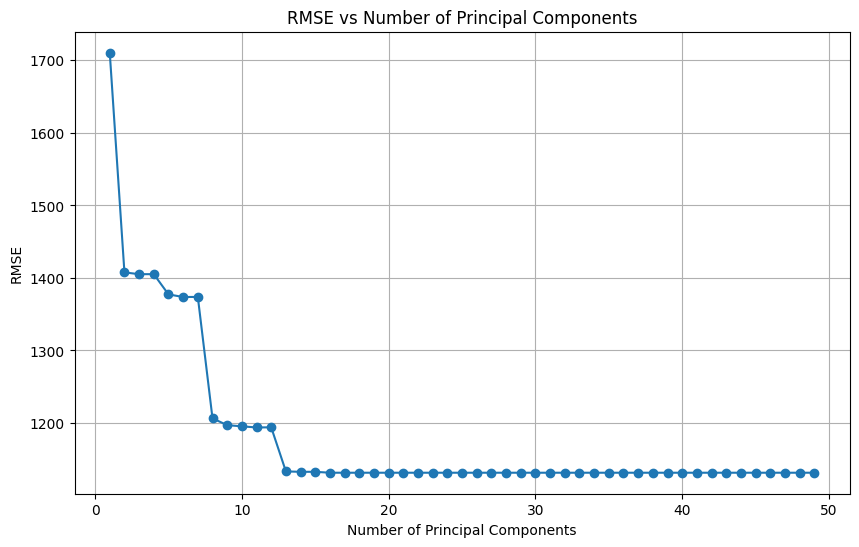

### Check DecisionTreeRegressor Model<a href="#Check-DecisionTreeRegressor-Model" class="anchor-link">¶</a>

In \[51\]:

    tree_reg =DecisionTreeRegressor()

    tree_reg.fit(X_train, y_train)

    #checking score 
    tree_reg.score(X_train, y_train)

Out\[51\]:

    1.0

In \[52\]:

    y_pred_tree = tree_reg.predict(X_test)
    tree_mse = mean_squared_error(y_test, y_pred_tree)
    tree_rmse = root_mean_squared_error(y_test, y_pred_tree)
    print(f"Mean Squared Error for Decision Tree: {tree_mse}")
    print(f"Root Mean Squared Error for Decision Tree: {tree_rmse}")

    Mean Squared Error for Decision Tree: 2341908.6281699035
    Root Mean Squared Error for Decision Tree: 1530.3295815509493

### check random forest model<a href="#check-random-forest-model" class="anchor-link">¶</a>

In \[53\]:

    forest_reg = RandomForestRegressor()

    forest_reg.fit(X_train, y_train)

    #checking score
    print(f"score of Random Forest Regressor model: {forest_reg.score(X_train, y_train)}")

    score of Random Forest Regressor model: 0.9365372916201469

In \[54\]:

    y_pred_forest = forest_reg.predict(X_test)
    forest_mse = mean_squared_error(y_test, y_pred_forest)
    forest_rmse =root_mean_squared_error(y_test, y_pred_forest)

    print(f"Mean Squared Error for Random Forest: {forest_mse}")
    print(f"Root Mean Squared Error for Random Forest: {forest_rmse}")

    Mean Squared Error for Random Forest: 1275995.4200048605
    Root Mean Squared Error for Random Forest: 1129.599672452529

### comparing the Rmse of all models<a href="#comparing-the-Rmse-of-all-models" class="anchor-link">¶</a>

In \[55\]:

    Rmse_vals = [rmse_sm,rmse_bx,rmse_lg,rmse_lg_pca,rmse_pcr[-1],tree_rmse,forest_rmse ]
    rmse_names = ['SM Model',"SM Model with Boxcox","linear Regression",
                  "PCA to linear Regression","partial least squares regression","Decision Tree","Random Forest"]

In \[56\]:

    # Plotting
    plt.figure(figsize=(10, 6))
    bars = plt.barh(rmse_names, Rmse_vals, color='skyblue')

    # Add values to the bars
    for bar, val in zip(bars, Rmse_vals):
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, round(val, 4), 
                 va='center', ha='left')

    plt.xlabel('RMSE')
    plt.title('RMSE Comparison for Different Models')
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest RMSE at the top
    plt.show()

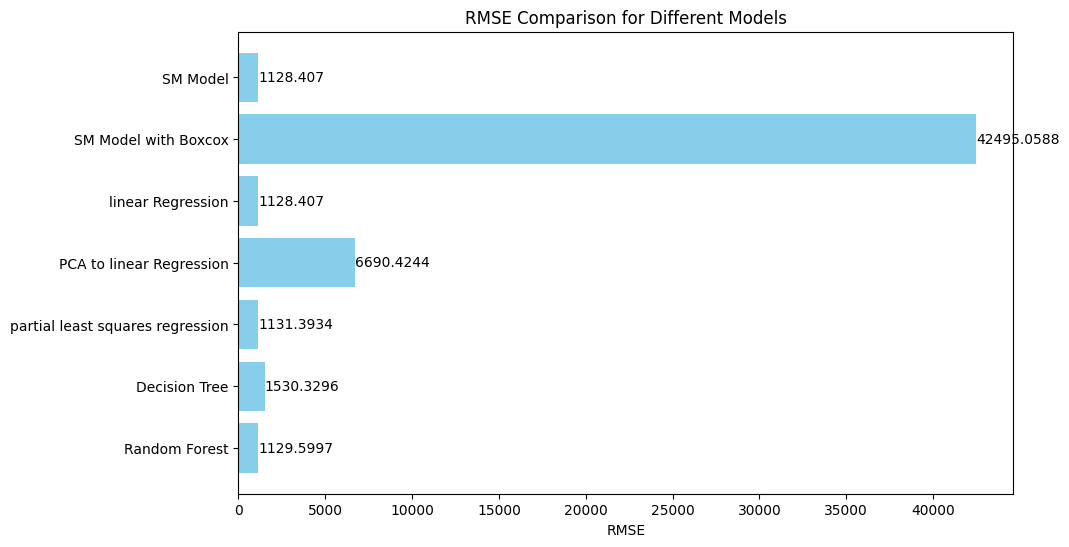

### Summary<a href="#Summary" class="anchor-link">¶</a>

-   the models ("SM model", "Linear Regression", "PCA to Linear
    Regression") have the lowest RMSE values, which means the better
    Model accuracy among the others

In \[ \]: